# Praca domowa 6

## Zadanie 1


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/MI2-Education/2023L-ExploratoryDataAnalysis/main/homeworks/hw6/house_data.csv")

1. Jaka jest średnia cena nieruchomości położonych nad wodą, których jakoś wykończenia jest równa lub większa od mediany jakości wykończenia?


In [3]:
# Wybór nieruchomości nad wodą
NadWoda = df[(df['waterfront'] == 1)]

# Liczenie mediany jakosci wykonczenia
mediana = NadWoda['grade'].median()

# Wybor mieszkan, o rownej lub wiekszej medianie
wybrane = NadWoda[(NadWoda['grade'] >= mediana)]

# Obliczanie sredniej
srednia = wybrane['price'].mean()

print("Średnia cena nieruchomości położonych nad wodą, których jakość wykończenia jest równa lub większa od mediany jakości wykończenia:")
print(srednia)

Średnia cena nieruchomości położonych nad wodą, których jakość wykończenia jest równa lub większa od mediany jakości wykończenia:
2302236.3095238097


Odp:

2. Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?


In [4]:
# Wybieramy mieszkania o 2 pietrach
dwaP = df[df['floors']==2]

# Liczymy mediane łazienek wśród nich
LazienkiDwa = dwaP['bathrooms'].mean()

# Wybieramy mieszkania o 3 pietrach
trzyP = df[df['floors']==3]

# Liczymy mediane łazienek wśród nich
LazienkiTrzy = trzyP['bathrooms'].mean()

print('Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?')
print(LazienkiDwa > LazienkiTrzy)

Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?
True


Odp:

3. Jak wygląda wartość kwartyla 0.25 oraz 0.75 jakości wykończenia nieruchomości położonych na północy biorąc pod uwagę czy ma ona widok na wodę czy nie ma?

In [5]:
# Zbadam na początku w jakich przedziałach znajduje się szerokość geograficzna nieruchomości
min_sz = df['lat'].min()
max_sz = df['lat'].max()

# Zbadam na początku w jakich przedziałach znajduje się długość geograficzna nieruchomości
min_dl = df['long'].min()
max_dl = df['long'].max()

# Po przeanalizowaniu danych i użyciu map, nieruchomości znajdują się w mieście Seattle

# Zakładam, że północ zaczyna się od szerokości geograficznej równej środkowi przedziału
polnoc = df[df['lat'] > (max_sz + min_sz)/2]

# Dzielę wybrane nieruchomości na grupy: te z widokiem na wode i te bez
woda = polnoc[polnoc['waterfront'] == 1]
nie_woda = polnoc[polnoc['waterfront'] == 0]

# Obliczam kwartyle 0.25 i 0.75 dla poszczególnych grup
kwartyle_woda = woda['grade'].quantile([0.25, 0.75])
kwartyle_nie_woda = nie_woda['grade'].quantile([0.25, 0.75])

print("Wartość kwartyla 0.25 dla jakości wykończenia (nieruchomości z widokiem na wodę):", kwartyle_woda[0.25])
print("Wartość kwartyla 0.75 dla jakości wykończenia (nieruchomości z widokiem na wodę):", kwartyle_woda[0.75])
print("Wartość kwartyla 0.25 dla jakości wykończenia (nieruchomości bez widoku na wodę):", kwartyle_nie_woda[0.25])
print("Wartość kwartyla 0.75 dla jakości wykończenia (nieruchomości bez widoku na wodę):", kwartyle_nie_woda[0.75])

Wartość kwartyla 0.25 dla jakości wykończenia (nieruchomości z widokiem na wodę): 8.0
Wartość kwartyla 0.75 dla jakości wykończenia (nieruchomości z widokiem na wodę): 10.0
Wartość kwartyla 0.25 dla jakości wykończenia (nieruchomości bez widoku na wodę): 7.0
Wartość kwartyla 0.75 dla jakości wykończenia (nieruchomości bez widoku na wodę): 8.0


Odp:

4. Pod którym kodem pocztowy jest położonych najwięcej nieruchomości i jaki jest rozstęp miedzykwartylowy dla ceny nieruchomości położonych pod tym adresem?

In [6]:
# Zliczam liczbę nieruchomości położonych pod konkretnym kodem pocztowym
kod_pocztowy_zliczanie = df['zipcode'].value_counts()

# Wybieram kod pocztowy z największą liczbą nieruchomości
popularny_kod_pocztowy = kod_pocztowy_zliczanie.index[0]

# Wybieramy tylko te nieruchomości położone pod tym adresem
nieruchomosci = df[df['zipcode']==popularny_kod_pocztowy]

# Obliczam rozstęp między kwartylowy dla tych danych
RMK = nieruchomosci['price'].quantile(0.75) - nieruchomosci['price'].quantile(0.25)

print("Kod pocztowy z największą liczbą nieruchomości:", popularny_kod_pocztowy)
print("Rozstęp miedzykwartylowy dla cen nieruchomości o tym kodzie pocztowym:", RMK)

Kod pocztowy z największą liczbą nieruchomości: 98103
Rozstęp miedzykwartylowy dla cen nieruchomości o tym kodzie pocztowym: 262875.0


Odp:

5. Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?

In [7]:
# Zakładam badanie powierzchni mieszkaniowej

# Wybierzmy te mieszkanie, której powierzchnia mieszkalna jest niższa od średniej
Mniej = df[df['sqft_living'] < df['sqft_living15']]

# Zliczamy te mieszkania
Mniej_liczba = Mniej.count()[1]

# Zliczam wszystkie
Wszystkie_liczba = df.count()[1]

# Obliczam procent
Procent = (Mniej_liczba / Wszystkie_liczba) * 100

print('Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?')
print(Procent, '%')

Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?
42.594734650441865 %


Odp:

 6. O ile procent więcej jest nieruchomości leżcych na północy zachód niż  nieruchomości leżących na południowy wschód?

In [8]:
# Będę korzystał z danych, które otrzymałem w zadaniu 3
# Ponownie zakładam, że północ zaczyna się od środka przedziału szerokości geograficznej
# Natomiast wschód od środka przedziału długości geograficznej

# Wybieram nieruchomości znajdujące się na północnym zachodzie
N_W = df[(df['lat'] > (max_sz + min_sz)/2) & (df['long'] < (max_dl + min_dl)/2)]

# Wybieram nieruchomości znajdujące się na południowym wschodzie
S_E = df[(df['lat'] <= (max_sz + min_sz)/2) & (df['long'] >= (max_dl + min_dl)/2)]

# Zliczam obie grupy nieruchomości
N_W_n = N_W.count()[1]
S_E_n = S_E.count()[1]

print('O ile procent więcej jest nieruchomości leżcych na północy zachód niż nieruchomości leżących na południowy wschód?')
print(((N_W_n - S_E_n)/S_E_n)*100, '%')

O ile procent więcej jest nieruchomości leżcych na północy zachód niż nieruchomości leżących na południowy wschód?
18343.529411764706 %


Odp:

# Zadanie 2

Dla wybranej zmiennej ze zbioru danych z Zadania 1 narysuj:

a) rozkład zmiennej jakościowej

b) rozkład zmiennej ilościowej

c) rozkład dwóch zmiennych (dowolna kombinacja jakościowej i ilościowej)

a)

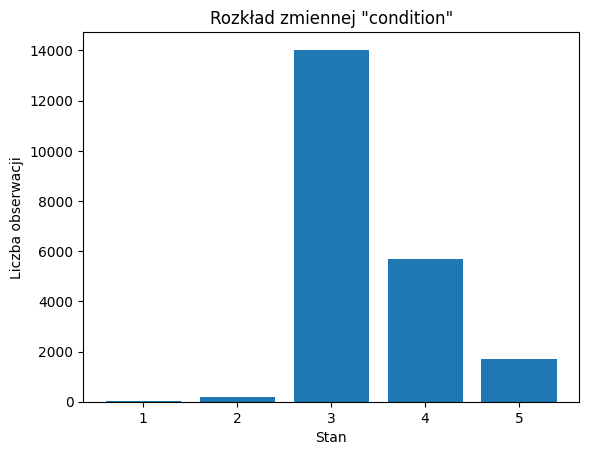

In [9]:
# Zbadamy rozkład zmiennej condition 

# Zliczanie nieruchomości względem ich stanu
Stan = df['condition'].value_counts().sort_index()

# Tworzenie wykresu słupkowego
plt.bar(Stan.index, Stan.values)

# Dodawanie etykiet osi
plt.xlabel('Stan')
plt.ylabel('Liczba obserwacji')

# Dodawanie tytułu wykresu
plt.title('Rozkład zmiennej "condition"')

# Wyświetlanie wykresu
plt.show()

b)

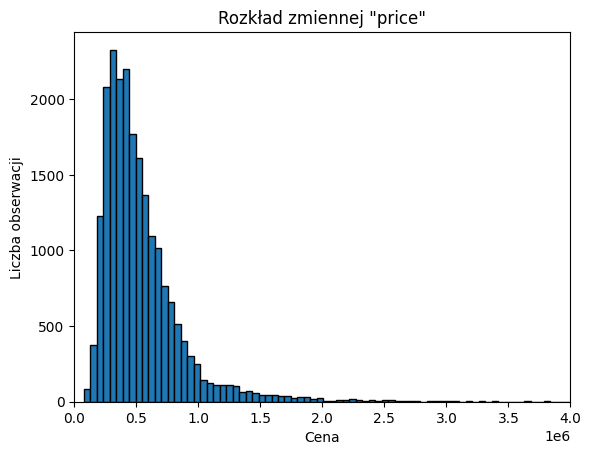

In [23]:
# Zbadamy rozkład zmiennej price

# Tworzenie histogramu
plt.hist(df['price'], bins=146, edgecolor='black')

# Dodawanie etykiet osi
plt.xlabel('Cena')
plt.ylabel('Liczba obserwacji')

# Dodawanie tytułu wykresu
plt.title('Rozkład zmiennej "price"')

# Zwiększenie czytelności
plt.xlim(0, 4e6)

# Wyświetlanie wykresu
plt.show()

c)

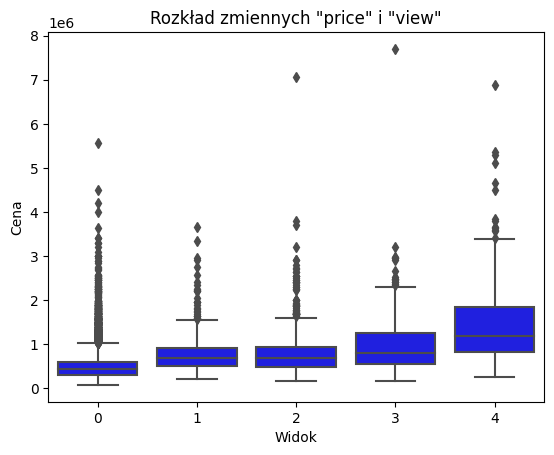

In [39]:
 # Zbadamy rozkład dwóch zmiennych: widok na nieruchomość i ceny

 # Tworzenie wykresu pudełkowego
sns.boxplot(x='view', y='price', data=df, color="blue")

# Dodawanie etykiet osi
plt.xlabel('Widok')
plt.ylabel('Cena')

# Dodawanie tytułu wykresu
plt.title('Rozkład zmiennych "price" i "view"')

plt.show()